In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# discovered the dataset on kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance
costs = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

costs

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
costs = pd.get_dummies(costs, dtype=int)

costs

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [20]:
def train_test_split_2d(X: tf.Tensor, y: tf.Tensor, frac = 0.8):
    assert len(X.shape) == 2, ValueError("Tensors input invalid")
    assert frac > 0 and frac < 1, ValueError("Split should be in range (0, 1)")

    rows, _ = X.shape

    split_index = round(rows * frac)

    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]

    return X_train, y_train, X_test, y_test

In [21]:
y = tf.constant(costs.pop("charges"))
X = tf.constant(costs)

X_train, y_train, X_test, y_test = train_test_split_2d(X, y)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Observations
# Adam won't work with single layer single unit model
# added 1 hidden layer & changed optimizer to Adam
# increased epochs to see if the losses are stabilizing or decreasing
# increased the learning_rate so as to require less epochs & minimize loss
# added the activation "relu" reduced the training loss more
# adding more layers doesn't seem to decrease the loss more

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 553us/step - loss: 9173.3682 - mae: 9173.3682
Epoch 2/100
34/34 [==============================] - 0s 573us/step - loss: 7206.3237 - mae: 7206.3237
Epoch 3/100
34/34 [==============================] - 0s 619us/step - loss: 6591.7046 - mae: 6591.7046
Epoch 4/100
34/34 [==============================] - 0s 571us/step - loss: 6189.7700 - mae: 6189.7700
Epoch 5/100
34/34 [==============================] - 0s 562us/step - loss: 5942.2939 - mae: 5942.2939
Epoch 6/100
34/34 [==============================] - 0s 531us/step - loss: 5676.6123 - mae: 5676.6123
Epoch 7/100
34/34 [==============================] - 0s 528us/step - loss: 5247.2734 - mae: 5247.2734
Epoch 8/100
34/34 [==============================] - 0s 551us/step - loss: 4697.1606 - mae: 4697.1606
Epoch 9/100
34/34 [==============================] - 0s 523us/step - loss: 3952.6033 - mae: 3952.6033
Epoch 10/100
34/34 [==============================] - 0s 511us/step - loss: 3602.0

In [23]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


## Visualizing the BMI correlation & prediction

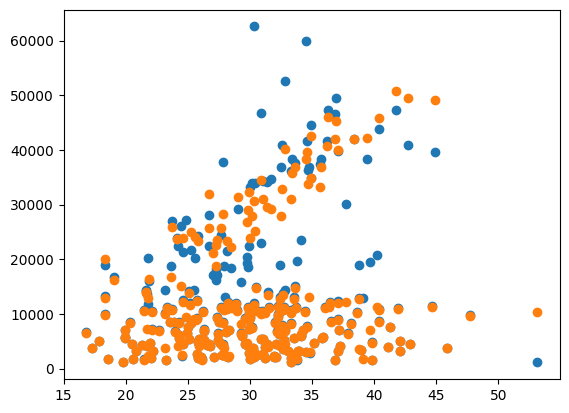

In [24]:
X_test_bmi = tf.squeeze(X_test[:, 1:2])

plt.scatter(X_test_bmi, y_test)
plt.scatter(X_test_bmi, y_pred)

## Visualizing the Age correlation & prediction

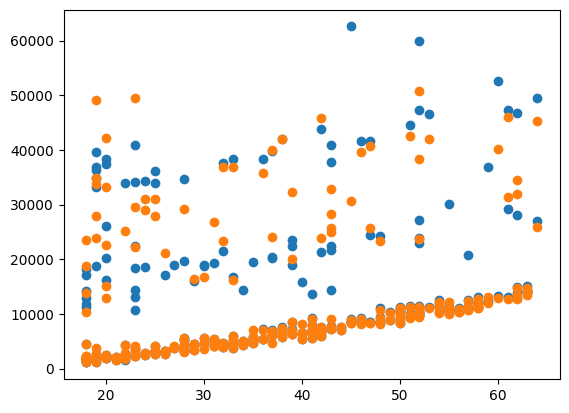

In [25]:
X_test_age = tf.squeeze(X_test[:, :1])

plt.scatter(X_test_age, y_test)
plt.scatter(X_test_age, y_pred)